## 28 de abril de 2021
## IB0017 Tarea 3 
## Estudiante: Mateo Cerdas Barboza

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#CÍRCULO DE MOHR (OOP), este objeto se utilizará mas tarde.
class mohr_circle:
    """
    mohr circle object
    """
    def __init__(self,sigma_x,sigma_y,tau_xy):
        self.sigma_x=sigma_x
        self.sigma_y=sigma_y
        self.tau_xy=tau_xy
        self.ref_point_1=(self.sigma_x,-self.tau_xy)
        self.ref_point_2=(self.sigma_y,self.tau_xy)
        self.center=round((self.sigma_x+self.sigma_y)/2,2)
        self.r=round((((self.sigma_x-self.sigma_y)/2)**2+self.tau_xy**2)**0.5,2)
        self.main_sigma1=round(self.center+self.r,2)
        self.main_sigma2=round(self.center-self.r,2)
        self.max_tau=self.r
        self.theta=(180/(np.pi*2))*np.arctan(abs(tau_xy/((sigma_x-sigma_y)/2)))#devuleve angulo en radianes y se pasa a grados
        #theta en radianes
        self_theta_rad=(1/(2))*np.arctan(abs(tau_xy/((sigma_x-sigma_y)/2)))#devuleve angulo en radianes y se pasa a grados
        self.gama=(2*self.theta-90)/2
        self.gama_prima=(2*self.theta+90)/2
        
    #Método para cambiar orientación de un ciruclo de mohr
    def rotate(self,angle_beta):#beta entra en grados
        self.sigma_x=round(self.center+self.r*np.cos(2*angle_beta*(np.pi/180)-2*self.theta*(np.pi/180)),2)
        self.sigma_y=round(self.center-self.r*np.cos(2*angle_beta*(np.pi/180)-2*self.theta*(np.pi/180)),2)
        self.tau_xy=round(self.r*np.sin(2*angle_beta*(np.pi/180)-2*self.theta*(np.pi/180)),2)
        self.ref_point_1=(self.sigma_x,-self.tau_xy)
        self.ref_point_2=(self.sigma_y,self.tau_xy)
    def graph(self):
        theta = np.linspace(0, 2*np.pi, 300)
        a = self.center+(self.r*np.cos(theta))
        b = self.r*np.sin(theta)
     
        plt.clf()
        figure, axes = plt.subplots(1,figsize=(15,15))
        axes.grid()
        axes.plot(a, b,color="black")
        #esfuerzos principales
        #normal
        axes.plot(self.main_sigma1,0,marker="X",color="red")
        axes.plot(self.main_sigma2,0,marker="X",color="red")
        
        axes.text(self.main_sigma2*1.1,self.r*0.07, f"{self.main_sigma2,0}", style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 5})
        
        axes.text(self.main_sigma1*1.1,self.r*0.07, f"{self.main_sigma1,0}", style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 5})
        
        #cortante
        axes.plot(self.center,self.max_tau,marker="X",color="cyan")
        
        axes.text(self.center,self.max_tau*1.07, f"({self.center,self.max_tau})", style='italic',
        bbox={'facecolor': 'cyan', 'alpha': 0.5, 'pad': 5})
        
        #esfuerzos actuales
        axes.plot(self.sigma_x,-self.tau_xy,marker="D",color="purple")
        
        axes.text(self.ref_point_1[0]*1.1,self.ref_point_1[1]*1.1, f"{self.ref_point_1}", style='italic',
        bbox={'facecolor': 'purple', 'alpha': 0.5, 'pad': 5})
        
        axes.plot(self.sigma_y,self.tau_xy,marker="D",color="purple")
        axes.text(self.ref_point_2[0]*1.3,self.ref_point_2[1]*1.3, f"{self.ref_point_2}", style='italic',
        bbox={'facecolor': 'purple', 'alpha': 0.5, 'pad': 5})
        
        #vertical line
        plt.vlines(self.center, -self.r*1.3,self.r*1.3, linestyles ="dotted", colors ="blue")
        plt.vlines(0, -self.r*1.3,self.r*1.3, linestyles ="solid", colors ="grey")
        plt.hlines(0,self.center-self.r*1.5,self.center+self.r*1.5, linestyles ="solid", colors ="grey")
        
        #circle center
        axes.plot(self.center,0,marker="+",color="blue",markersize=15)
        axes.text(self.center+self.r*0.07,self.r*0.07, f"({self.center},0)", style='italic',
        bbox={'facecolor': 'blue', 'alpha': 0.5, 'pad': 5})
        
        ##origin mark
        axes.text(self.r*0.07,self.r*0.07, "(0,0)", style='italic',
        bbox={'facecolor': 'grey', 'alpha': 0.5, 'pad': 5})
              
        axes.set_aspect(1)
        axes.set_xlim((self.center-self.r*1.5,self.center+self.r*1.5)) 
        axes.set_ylim((-self.r*1.3,self.r*1.3))
        axes.set_xticks(np.linspace(self.center-self.r*1.5,self.center+self.r*1.5,20))
        axes.set_yticks(np.linspace(-self.r*1.3,self.r*1.3,20))
        plt.xlabel("σ",fontsize=17)
        plt.ylabel("T",fontsize=17)
        plt.title('Mohr Circle',fontsize=30)
        
        plt.show()
        plt.tight_layout()
    def set_E(self,elasticity_modulus):
        self.E=elasticity_modulus
        
    def set_poisson(self,poisson):
        self.poisson=poisson
        
        
        #deformación en el eje del esfuerzo
        self.def_x=round(self.sigma_x/self.E,2)
        #calcular deformación en eje perpendicular(en signo contrario)
        self.def_y=-self.poisson*self.def_x
        
        self.strain_r=abs((self.def_x-self.def_y)/2)
        
        self.strain_center=round((self.def_x+self.def_y)/2,2)
        
        self.max_gama_div2=round(self.strain_r,2)
        
    def strain_graph(self):
        #Redefinir deformaciones para refrezcar una posible rotación
        
        #deformación en el eje del esfuerzo
        self.def_x=round(self.sigma_x/self.E,2)
        #calcular deformación en eje perpendicular(en signo contrario)
        self.def_y=round(-self.poisson*self.def_x,2)
        
        self.strain_r=abs((self.def_x-self.def_y)/2)
        
        self.strain_center=round((self.def_x+self.def_y)/2,2)
        
        self.max_gama_div2=round(self.strain_r,2)
        
        
        
        theta = np.linspace(0, 2*np.pi, 300)
        a = self.strain_center+(self.strain_r*np.cos(theta))
        b = self.strain_r*np.sin(theta)
     
        plt.clf()
        figure, axes = plt.subplots(1,figsize=(15,15))
        axes.grid()
        axes.plot(a, b,color="black")
        axes.plot(self.strain_center+self.strain_r,0,marker="X",color="red")
        axes.plot(self.strain_center-self.strain_r,0,marker="X",color="red")
        
        axes.text(self.def_x*1.2,self.strain_r*0.07, f"({self.def_x},0)", style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 5})
        
        axes.text(self.def_y*1.2,self.strain_r*0.07, f"{self.def_y,0}", style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 5})
        
        #deformación cortante
        axes.plot(self.strain_center,self.max_gama_div2,marker="X",color="cyan")
        
        axes.text(self.strain_center,self.max_gama_div2*1.07, f"({self.strain_center,self.max_gama_div2})", style='italic',
        bbox={'facecolor': 'cyan', 'alpha': 0.5, 'pad': 5})
        
        #vertical line
        plt.vlines(self.strain_center, -self.strain_r*1.3,self.strain_r*1.3, linestyles ="dotted", colors ="blue")
        plt.vlines(0, -self.strain_r*1.3,self.strain_r*1.3, linestyles ="solid", colors ="grey")
        plt.hlines(0,self.strain_center-self.strain_r*1.5,self.strain_center+self.strain_r*1.5, linestyles ="solid", colors ="grey")
        
        #circle center
        axes.plot(self.strain_center,0,marker="+",color="blue",markersize=15)
        axes.text(self.strain_center+self.strain_r*0.07,self.strain_r*0.07, f"({self.strain_center},0)", style='italic',
        bbox={'facecolor': 'blue', 'alpha': 0.5, 'pad': 5})
        
        #origin mark
        axes.text(self.strain_r*0.07,self.strain_r*0.07, "(0,0)", style='italic',
        bbox={'facecolor': 'grey', 'alpha': 0.5, 'pad': 5})
              
        axes.set_aspect(1)
        axes.set_xlim((self.strain_center-self.strain_r*1.5,self.strain_center+self.strain_r*1.5)) 
        axes.set_ylim((-self.strain_r*1.3,self.strain_r*1.3))
        axes.set_xticks(np.linspace(self.strain_center-self.strain_r*1.5,self.strain_center+self.strain_r*1.5,20))
        axes.set_yticks(np.linspace(-self.strain_r*1.3,self.strain_r*1.3,20))
        plt.xlabel("ϵ",fontsize=17)
        plt.ylabel("ɣ/2",fontsize=17)
        plt.title('Strain Mohr Circle',fontsize=30)
        
        plt.show()
        plt.tight_layout()

## Primera parte 

#### Formulas
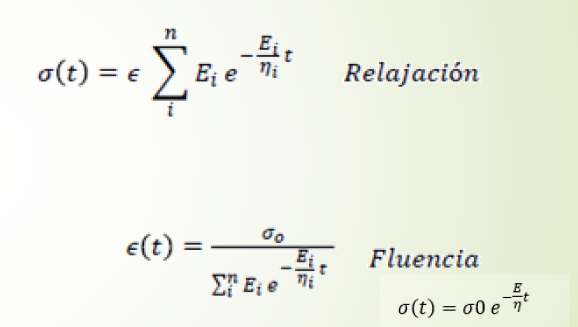

#### Definir modelos de Maxwell para fluencia

In [3]:
def maxwell_sum_t(E_series, Tau_series, time):
    zi=zip(E_series, Tau_series)
    result=sum([E*np.exp(-(1/Tau)*time) for E,Tau in zi])
    return result

### Insertando valores dados de E(GN/m²), Tau(s), σ(N/m2), ϵ(%)

In [4]:
E_series=np.array([3,2.5,2,1.5,1.20,1.1,1])*10**9
Tau_series=np.array([10**n for n in range(0,7)])
sigma_series=np.array([0.5,0.75,1,1.25,1.5])
epsilon_series=[0.1,0.2,0.3,0.4,0.5]

### Generar la suma del modelo de Maxwell

In [5]:
time_series=np.array(range(0,600))
maxwell_sum_series=maxwell_sum_t(E_series, Tau_series,time_series)

### Modelos de maxwell en Fluencia, se utiliza la suma generada antes

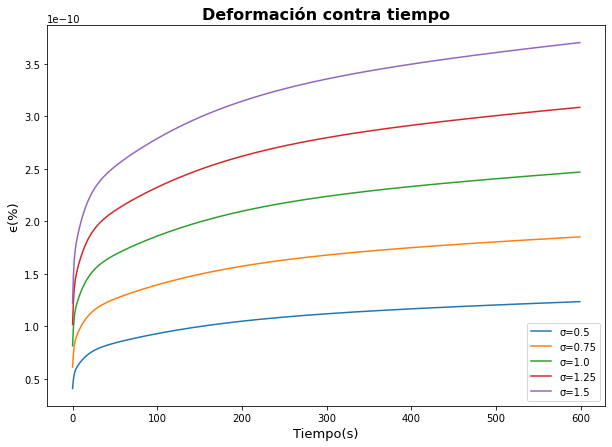

In [6]:
plt.figure(figsize=(10,7))
for sigma in sigma_series:
    y=sigma/maxwell_sum_series
    label=f"σ={sigma}"
    plt.plot(time_series,y,label=label)
plt.legend(loc='lower right')
#añadir etiquetas
plt.title("Deformación contra tiempo", fontsize=16, fontweight='bold')
plt.xlabel("Tiempo(s)",fontsize=13)
plt.ylabel("ϵ(%)",fontsize=13)
plt.show()

### Modelos de maxwell en Ración, se utiliza la suma generada antes

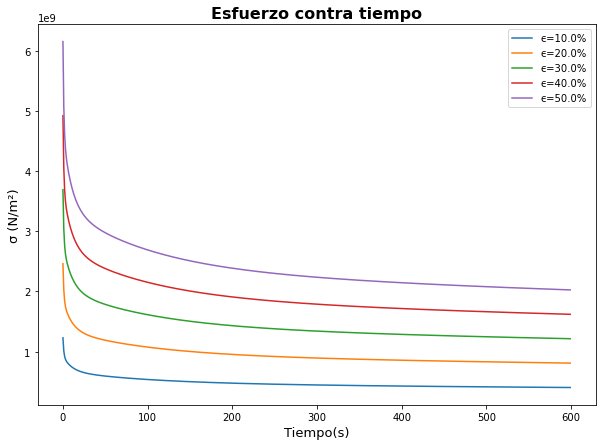

In [7]:
%matplotlib inline
plt.figure(figsize=(10,7))
for epsilon in epsilon_series:
    y=epsilon*maxwell_sum_series
    label=f"ϵ={epsilon*100}%"
    plt.plot(time_series,y,label=label)
plt.legend(loc='upper right')
#añadir etiquetas
plt.title("Esfuerzo contra tiempo", fontsize=16, fontweight='bold')
plt.xlabel("Tiempo(s)",fontsize=13)
plt.ylabel("σ (N/m²)",fontsize=13)
plt.show() 

## Segunda parte

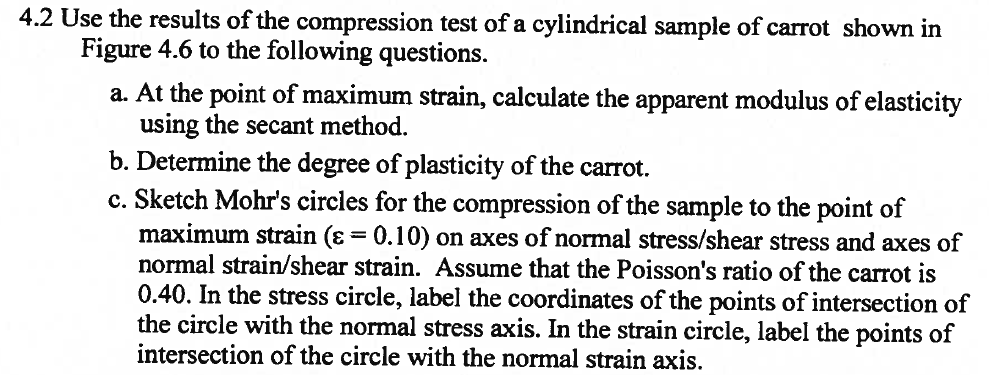

### A)
### Figura 4.6
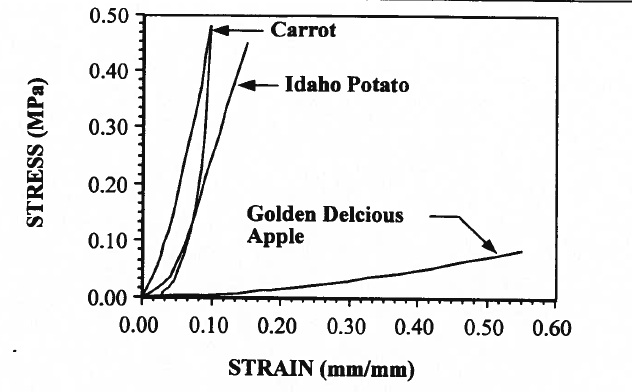
#### Teoría en página 115 Stroshine

In [8]:
#Definir función del método secante para calcular modulo de elasticidad
def secant_modulus(stress,strain):
    result=stress/strain
    return result
#definir datos extraidos de la gráfica
sigma=0.48
epsilon=0.1

In [9]:
#aplicar función en la solución
mod_elast=secant_modulus(sigma,epsilon)
print(f"E= {mod_elast} [MN/m²] en el punto de mayor esfuerzo")

E= 4.8 [MN/m²] en el punto de mayor esfuerzo


### B)
### Grafico ilustrativo
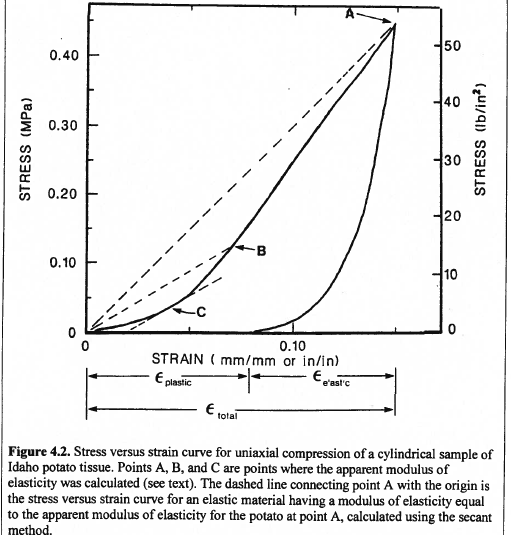
### Plasticidad = Ԑplástica/ Ԑtotal

In [10]:
### Definir función método
def grado_plsticidad(epsilon_plastica,epsilon_total):
    result=epsilon_plastica/epsilon_total
    return result
#definir variables conocidas
e_plast=0.03
e_total=0.1

In [11]:
#aplicar función enla solución
grad_plast=grado_plsticidad(e_plast,e_total)
print(f"El grado de plasticidad es = {grad_plast}")

El grado de plasticidad es = 0.3


### c)

In [12]:
#Usar OOP para dibujar el circulo de mohr para tensión uniaxial 
circle101=mohr_circle(-sigma,0,0)

<Figure size 432x288 with 0 Axes>

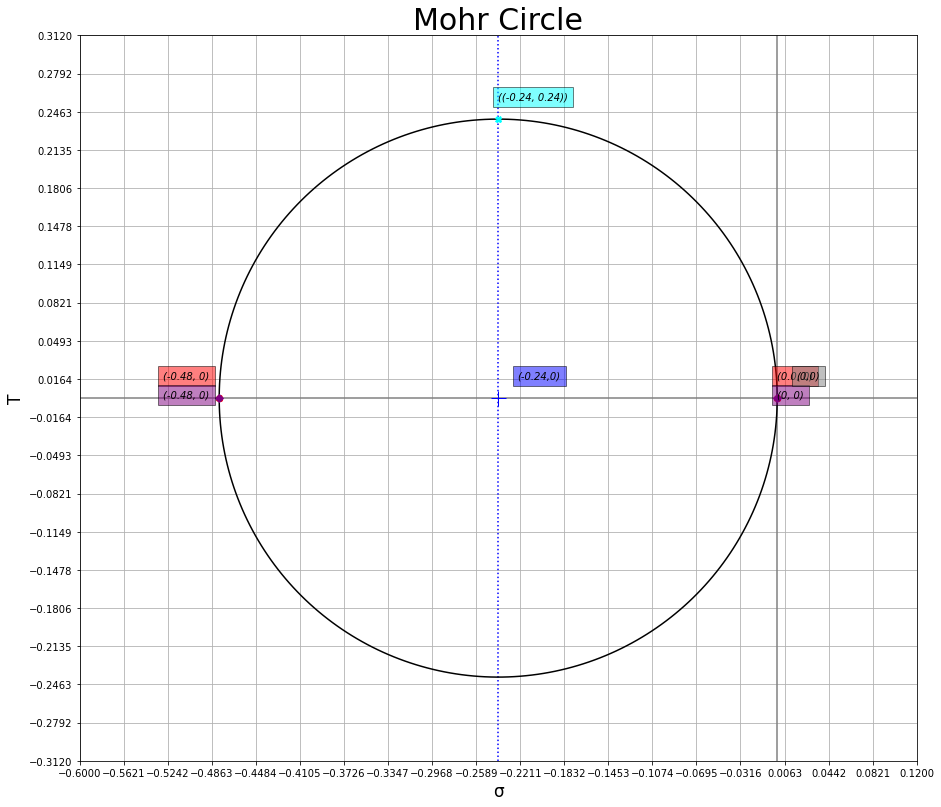

<Figure size 432x288 with 0 Axes>

In [13]:
#dibujar CÍRUCLO DE MOHR DE ESFUERZO
circle101.graph()

<Figure size 432x288 with 0 Axes>

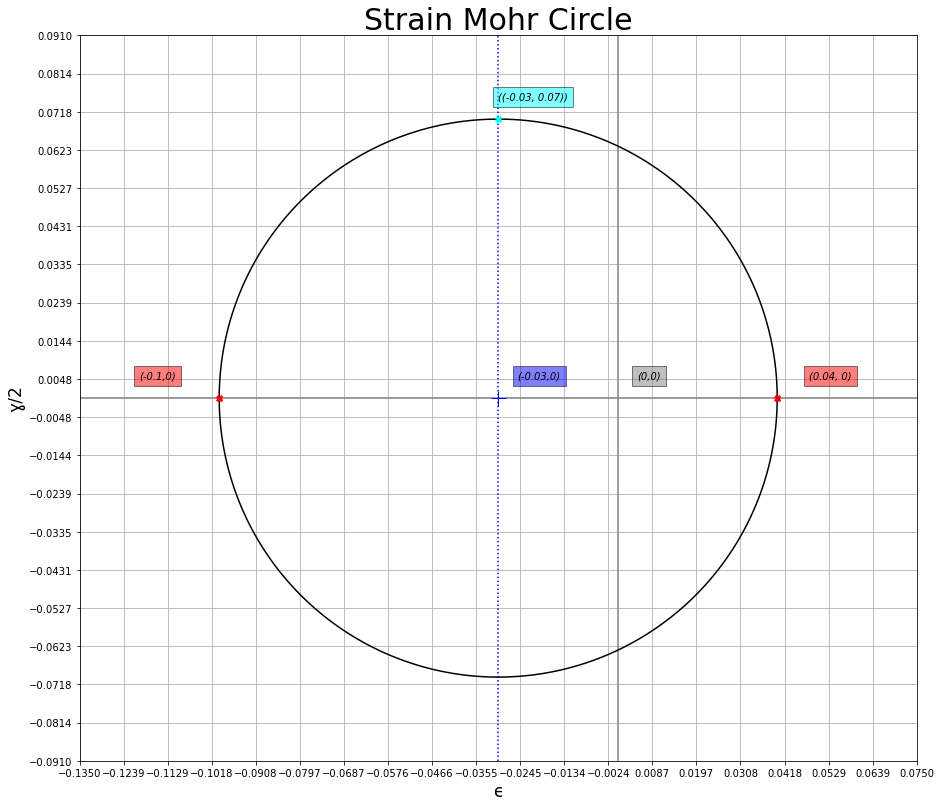

<Figure size 432x288 with 0 Axes>

In [14]:
#dibujar CÍRUCLO DE MOHR DE DEFORMACIÓN USANDO OOP
#definir el coeficiente de expansión dado
poisson=0.4
circle101.set_E(mod_elast)
circle101.set_poisson(poisson)
circle101.strain_graph()

### Teoría en página 118 Stroshine
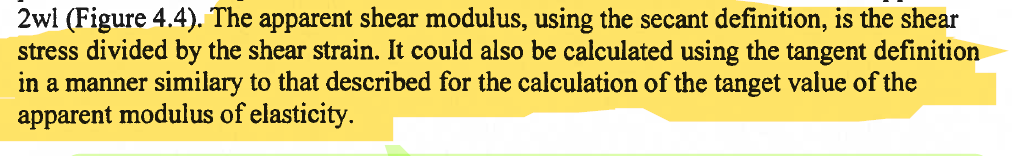

In [15]:
# Con base en el párrafo anterior se procede a estimar G con el método de la secante
#EL MÓDULO DE CORTANTE EN EL PUNTO DE MÁXIMO ESFUERZO CORTANTE ES ENTONCES G=Tau_max/gamma_max
#Usando los atributos .max_tau y .max_gama_div2 del objeto circle101 se puede alcular G_max
G=round(circle101.max_tau/(circle101.max_gama_div2*2),2)
print(f"en el máximo esfuerzo cortante se tiene G={G}[MN/m²]")

en el máximo esfuerzo cortante se tiene G=1.71[MN/m²]



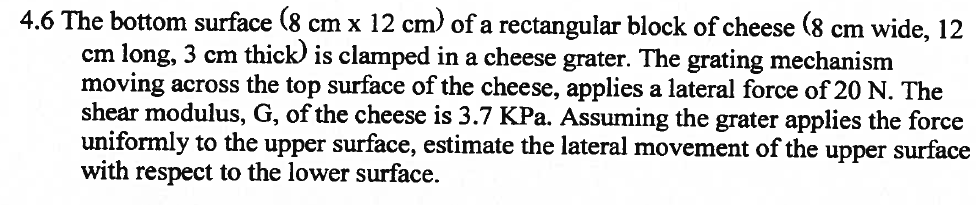

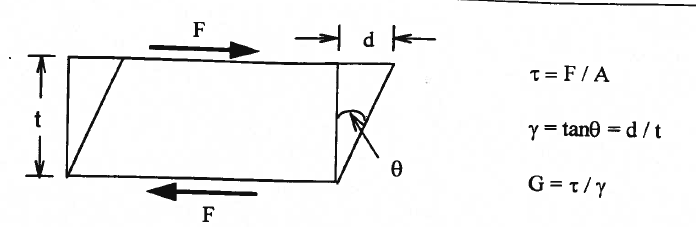

In [16]:
#definir datos dados
F=20
G=3.7*(10**3)
A=0.08*0.12
t=0.03
#definir función de esfuerzo cortante
def tau_calculator(F,A):
    result=F/A
    return result
#derivar datos desconocidos
tau=tau_calculator(F,A)
gama=tau/G
d=round(gama*t,2)
#imprimir resultados
print(f"R/ The upper surface moves d= {d}m with respect to the lower one")

R/ The upper surface moves d= 0.02m with respect to the lower one


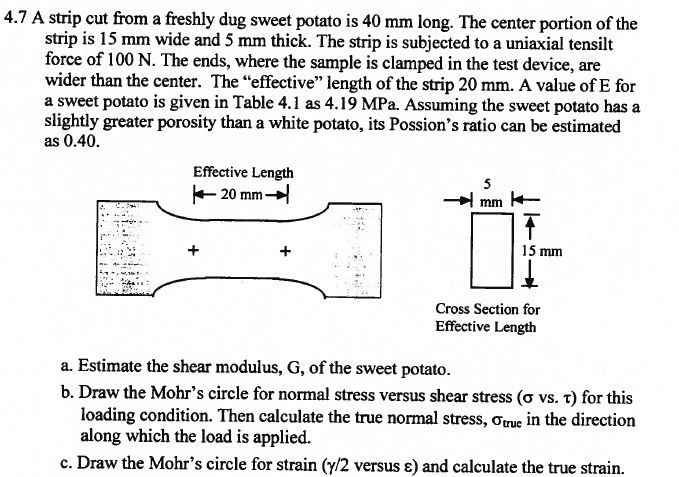

In [17]:
#DEFINIR DATOS DADOS
#área transversaal 
A=5*10**(-3)*15*10**(-3)
F=100
sigma=round((F/A)/10**6,2)#en mega pascales
print(f"σ={sigma}[MN/m²]")
E=4.19
poisson=0.4 

σ=1.33[MN/m²]


<Figure size 432x288 with 0 Axes>

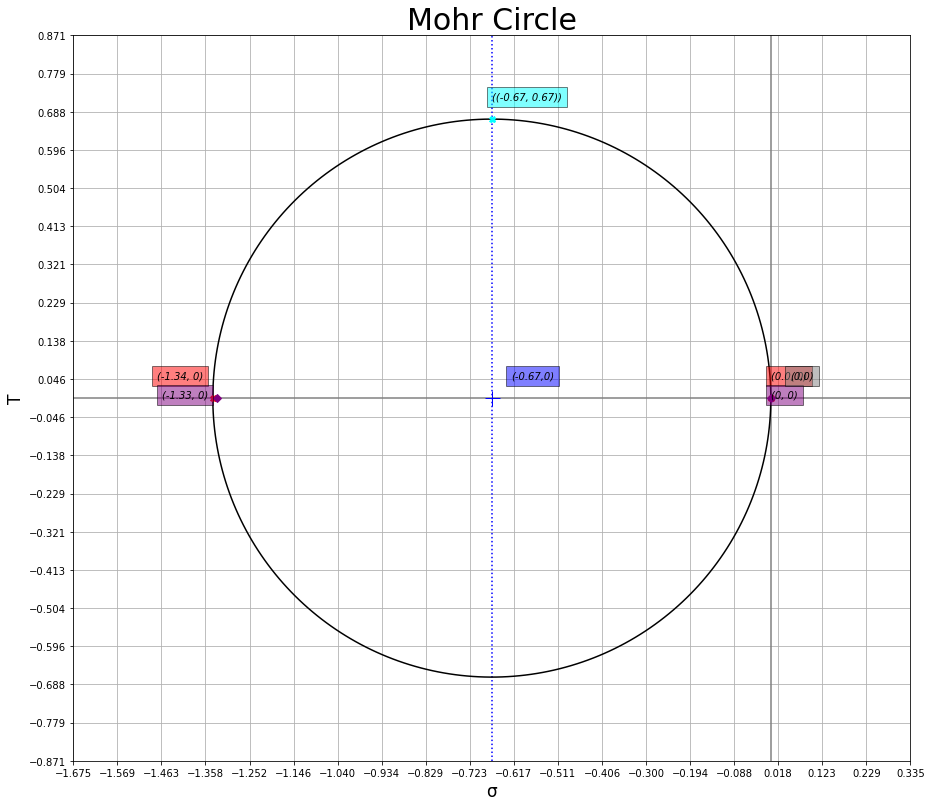

<Figure size 432x288 with 0 Axes>

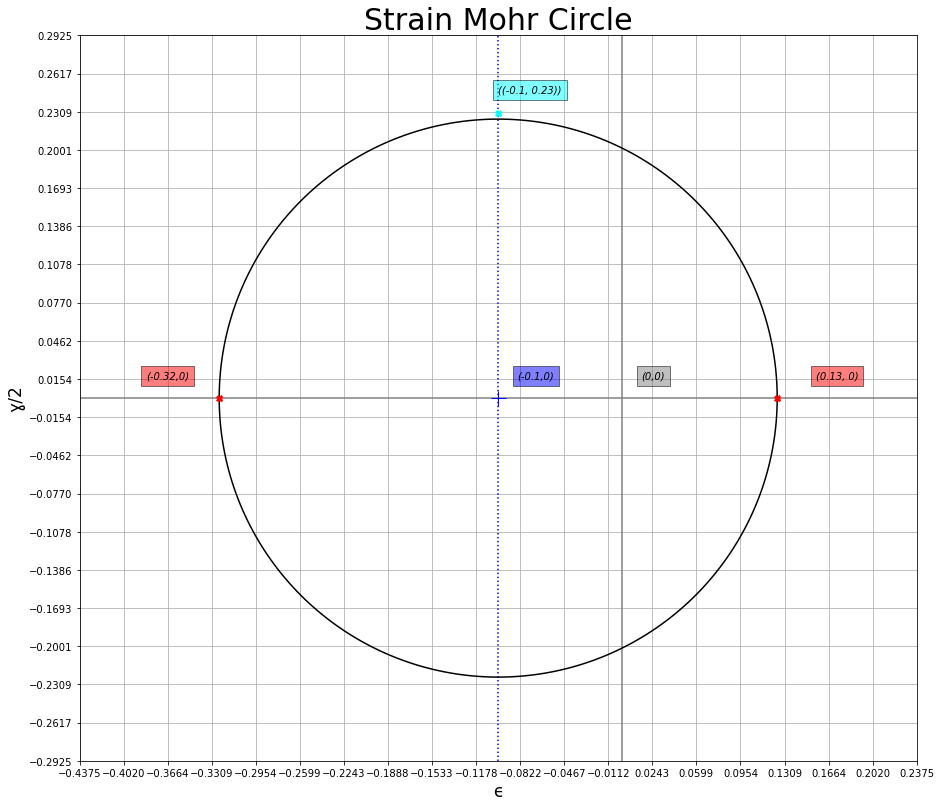

<Figure size 432x288 with 0 Axes>

In [18]:
#Definir objeto círculo de mohr para este caso y graficar
circle102=mohr_circle(-sigma,0,0)
#graficar círculo
circle102.graph()
#Definir E y poisson para este circulo
circle102.set_E(E)
circle102.set_poisson(poisson)
#graficar circulo de mohr de deformación
circle102.strain_graph()

In [19]:
#Calcular G
G=round(circle102.max_tau/(circle102.max_gama_div2*2),2)
print(f"en el máximo esfuerzo cortante se tiene G={G}[MN/m²]")

en el máximo esfuerzo cortante se tiene G=1.46[MN/m²]
